In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from collections import Counter
import math
import seaborn as sns 

In [2]:
data=pd.read_csv("kaggle-survey-2018/multipleChoiceResponses.csv")
preguntas=data.iloc[:1]
data = data.iloc[1:]

/srv/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data=data[data["Q3"]!="I do not wish to disclose my location"]
a=Counter(data["Q3"])
a['United States'] = a.pop("United States of America")
a["United Kingdom"] = a.pop("United Kingdom of Great Britain and Northern Ireland")
a["Iran, Islamic Rep."] = a.pop("Iran, Islamic Republic of...")
a["Hong Kong SAR, China"] = a.pop("Hong Kong (S.A.R.)")
a["Korea, Dem. People’s Rep."] = a.pop("Republic of Korea")
a["Korea, Rep."] = a.pop("South Korea")

In [4]:
poblacion=pd.read_csv("https://raw.githubusercontent.com/datasets/population/master/data/population.csv")
population=poblacion.iloc[2624:]
population=population[population["Year"]==2016]

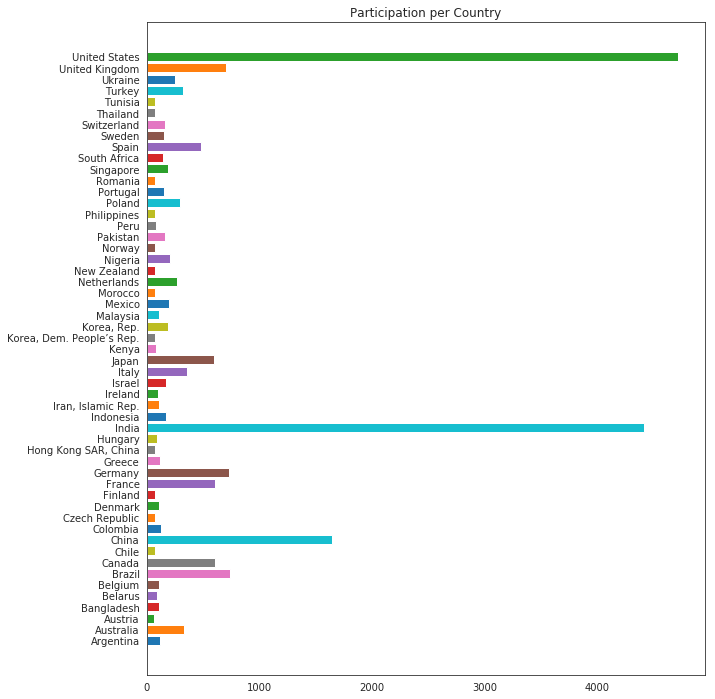

In [5]:
sns.set_style("white")
plt.figure(figsize=(10,12))
for i in population["Country Name"]:
    if i in a:
        plt.barh(i,a[i])
plt.title("Participation per Country")
plt.show()  

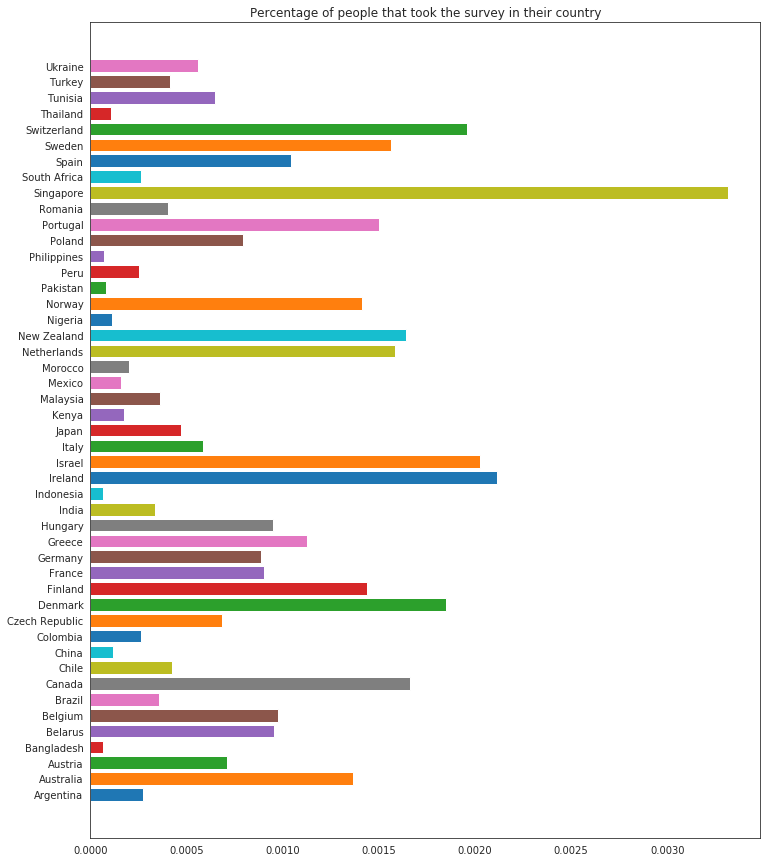

In [6]:
population['new_index'] = range(len(population)) #orders the list
population = population.set_index('new_index')
proportion = {}
for l in range(len(population['Country Name'])):
    proportion[population['Country Name'][l]] = population['Value'][l]
sns.set_style("white")
plt.figure(figsize=(12,15))
porcentage_data = {}
for i in population['Country Name']:
    if i in Counter(data.Q3):
        porcentage_data[i] = (a[i]/proportion[i])*100
        plt.barh(i,(a[i]/proportion[i])*100)
plt.title('Percentage of people that took the survey in their country')
plt.show()

# Gender In Countries

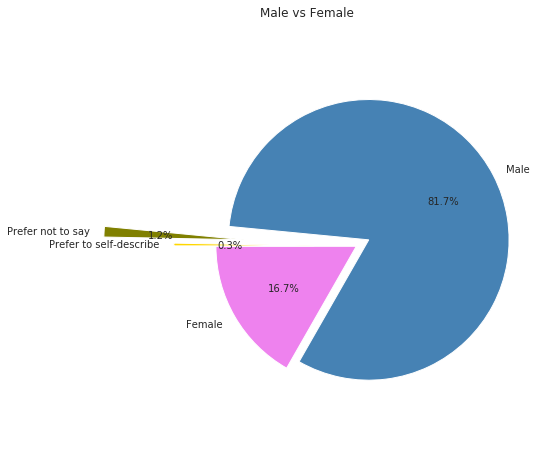

In [7]:
total=len(data)
labels=[]
values=[]
sns.set_style("white")
plt.figure(figsize=(8,8))
for i in sorted(Counter(data["Q1"])):
    labels.append(i)
    values.append(Counter(data["Q1"])[i])
colors=["violet","steelblue","olive","gold"]
explode = (0, 0.1, 0.8, 0.3)
plt.pie(values,labels=labels,shadow=False,colors=colors,explode=explode,startangle=180,autopct='%1.1f%%')
plt.axis("equal")
plt.title("Male vs Female")
plt.show()

In [8]:
def plotting_male_vs_female(data,title):
    total= len(data)
    labels=[]
    values=[]
    plt.figure(figsize=(8,8))
    for i in sorted(Counter(data)):
        labels.append(i)
        values.append(Counter(data)[i])
    colors=["violet","steelblue","olive","gold"]
    explode = (0, 0.1, 0.8, 0.3)
    plt.pie(values,labels=labels,shadow=False,colors=colors,explode=explode,startangle=180,autopct='%1.1f%%')
    plt.axis("equal")
    plt.title("Male Vs Female in "+title)
    plt.show()

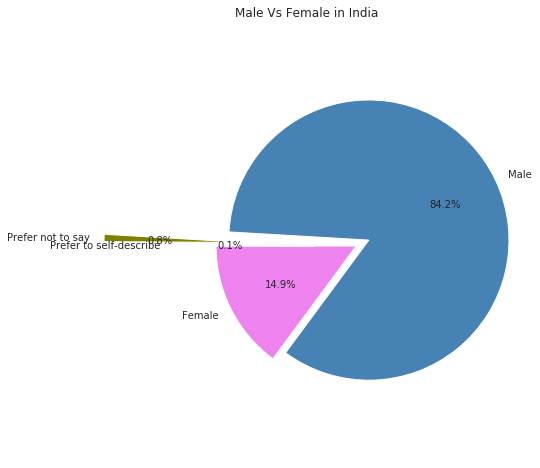

In [9]:
sns.set_style("white")
datos_India=data[data.Q3=="India"]
plotting_male_vs_female(datos_India.Q1,"India")

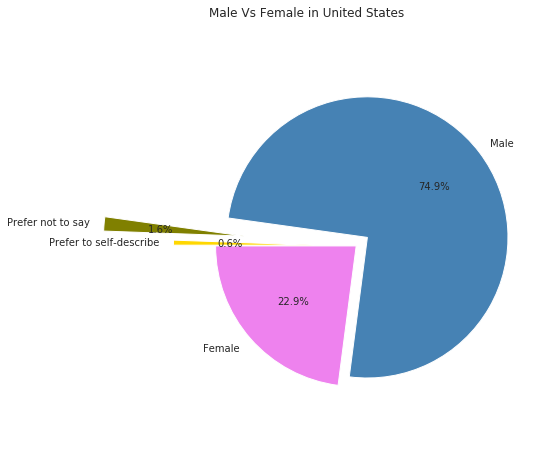

In [10]:
sns.set_style("white")
datos_USA=data[data.Q3=="United States of America"]
plotting_male_vs_female(datos_USA.Q1,"United States")

# Gender in Latin-America

In [11]:
def plot_Lat_america(data):
    total= len(data)
    labels=[]
    values=[]
    for i in sorted(Counter(data)):
        labels.append(i)
        values.append(Counter(data)[i])
    return labels, values


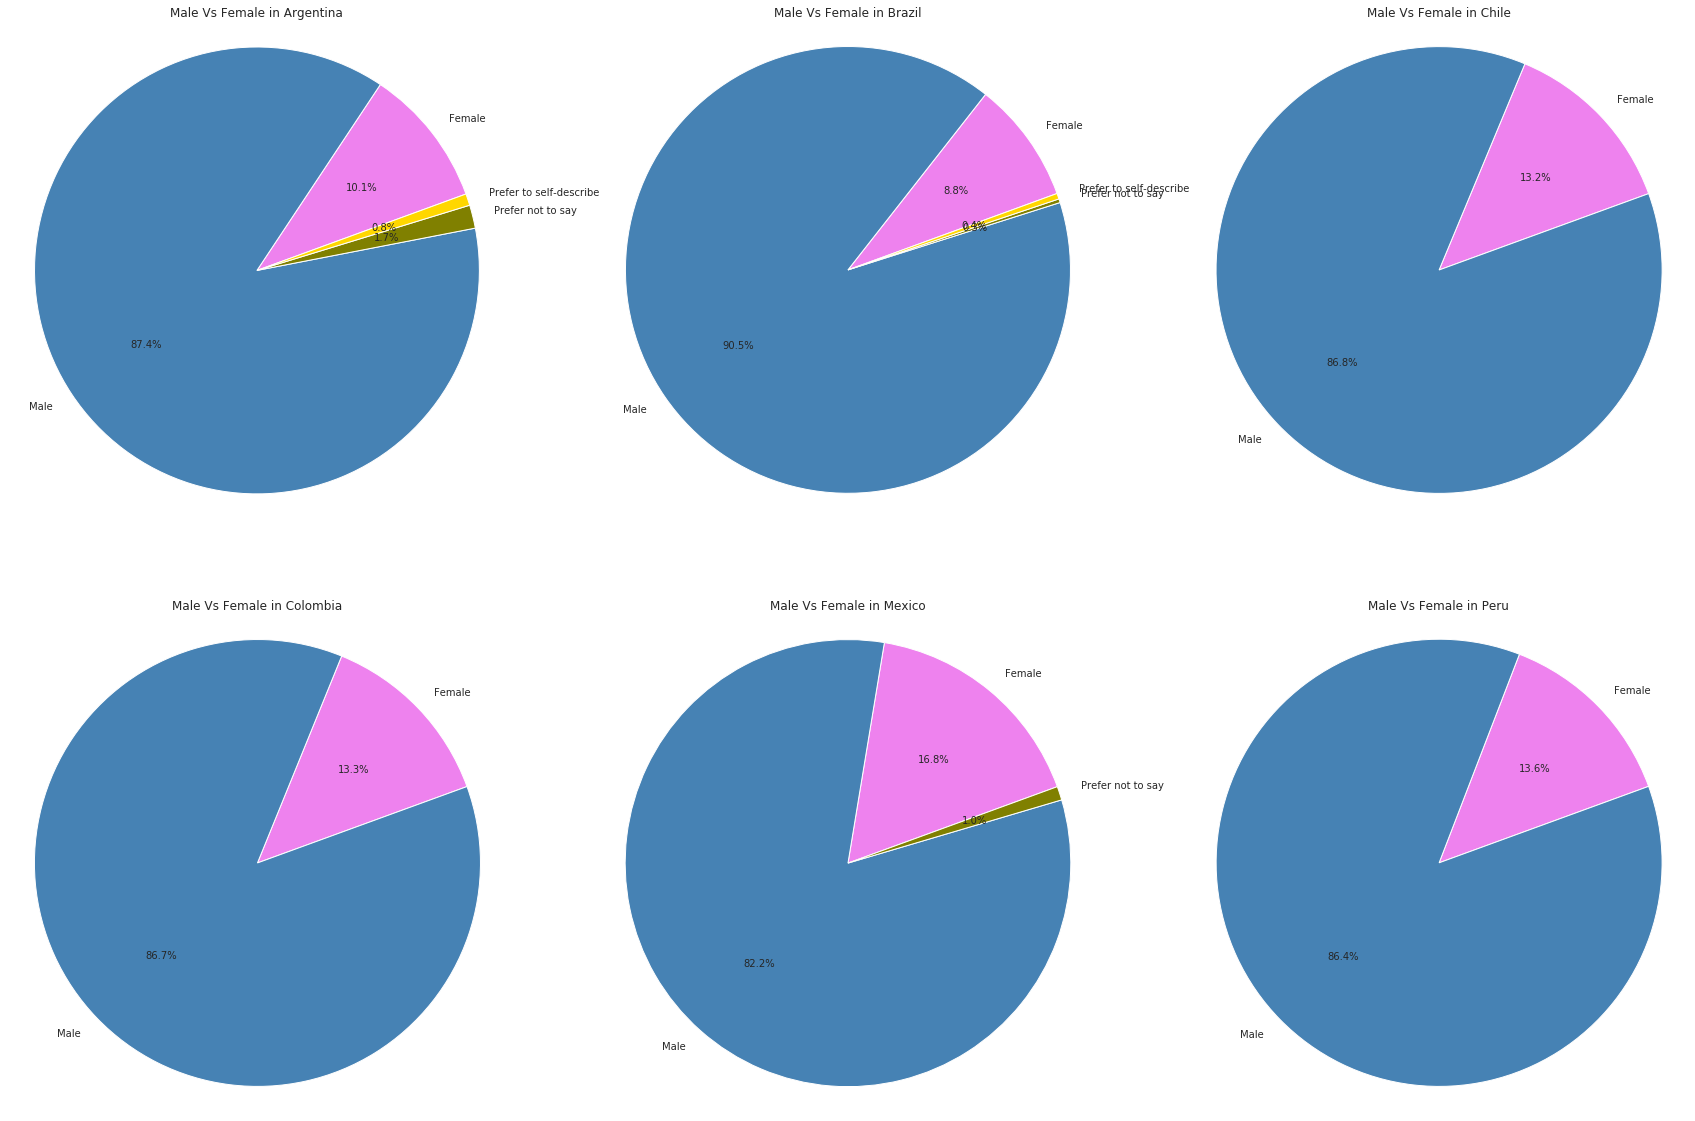

In [12]:
sns.set_style("white")
plt.figure(figsize=(30,20))
Lat_american=["Argentina","Brazil","Chile","Colombia","Mexico","Peru"]
k=1
for i in Lat_american:
    datos_lat=data[data.Q3==i]
    labels,values=plot_Lat_america(datos_lat.Q1)
    colors=["violet","steelblue","olive","gold"]
    plt.subplot(2,3,k)
    plt.pie(values,labels=labels,shadow=False,colors=colors,startangle=20,autopct='%1.1f%%')
    plt.axis("equal")
    plt.title("Male Vs Female in "+i)
    k+=1
plt.show()

# Question we are interested in

In [68]:
data = data.rename(columns={'Q1':'Gender','Q2': 'Age', 'Q3': 'Country', 'Q4': 'Education', 'Q5': 'Major', 'Q6': 'Role', 
                            'Q7': 'industry','Q8': 'Experience', 'Q9': 'Salary'})

In [69]:
for i in Lat_american:
    datos_lat=data[data.Country==i]
    idd=0
    for j in datos_lat.Salary.dropna():
        if len(j)>20:
            #print(j[:-4].split("-"))
            idd+=1
    print(i,idd,str(len(datos_lat.Salary.dropna())/idd)+"%")

Argentina 13 8.615384615384615%
Brazil 97 6.742268041237113%
Chile 10 7.0%
Colombia 14 8.214285714285714%
Mexico 32 5.75%
Peru 20 3.7%


In [70]:
nuevo_dict={}
for i in Lat_american:
    nuevo=data[data.Country==i]
    nuevo=nuevo[nuevo.Education != "I prefer not to answer"]
    nuevo=nuevo[nuevo.Education != 'No formal education past high school']
    for j in Counter(nuevo.Education.dropna()).keys():
        if i in nuevo_dict:
            nuevo_dict[i].append(Counter(nuevo.Education.dropna())[j])
        else:
            nuevo_dict[i]=[Counter(nuevo.Education.dropna())[j]]

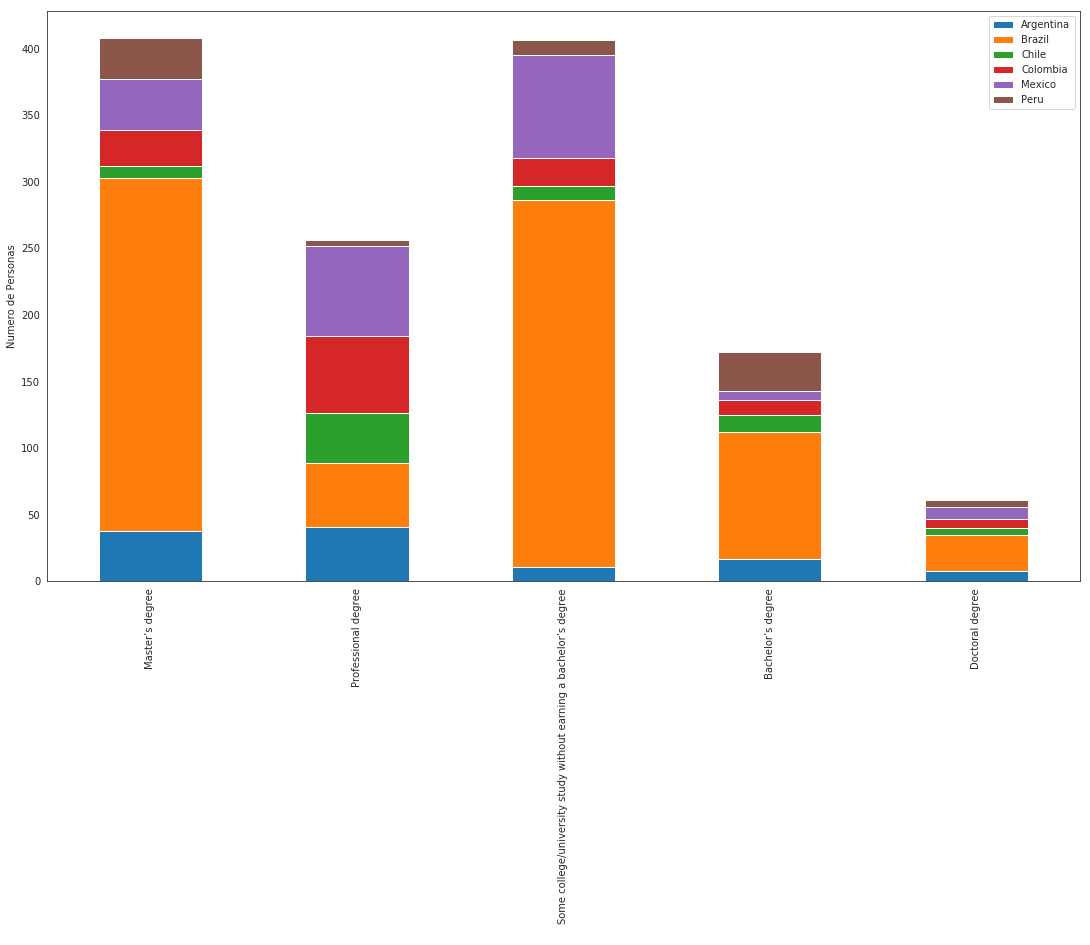

In [71]:
sns.set_style("white")
x_axis=list(Counter(nuevo.Education.dropna()).keys())
index = pd.Index(x_axis, name=' ')
datos_education = nuevo_dict
df = pd.DataFrame(datos_education, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(18.5, 10.5))
ax.set_ylabel('Numero de Personas')
plt.show()

In [72]:
New_data=data
New_data=New_data[New_data['Salary'] != 'I do not wish to disclose my approximate yearly compensation']

In [73]:
#redefine salary

salaries = np.zeros(len(New_data))
num = 0
for string in New_data['Salary']:
    try:
        math.isnan(string)
        salaries[num] = float('NaN')
        num += 1
    except:
        if string == '500,000+':
            salaries[num] = 500.0
        else:
            salaries[num] = np.mean(np.int_(np.array(string[:-4].split('-'))))
        num+=1
New_data['Salary(USD)']=salaries

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [83]:
def Get_newColumn(dataframe,characteristic, to_ignore,return_to_ignore, name_to_return):
    New_arr=np.zeros(len(dataframe))
    index=0
    for char in dataframe[characteristic]:
        try:
            math.isnan(char)
            New_arr[index]=float('NaN')
            index +=1
        except:
            if char == to_ignore:
                New_arr[index]= return_to_ignore
            else:
                New_arr[index]= np.mean(np.int_(np.array(char.split("-"))))
            index+=1
    dataframe[name_to_return]= New_arr
    return dataframe

In [84]:
New_data=Get_newColumn(New_data,'Age',"80+",80.0,"New_Age")
New_data=Get_newColumn(New_data,'Experience',"30 +",30.0,"New_Experience")

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


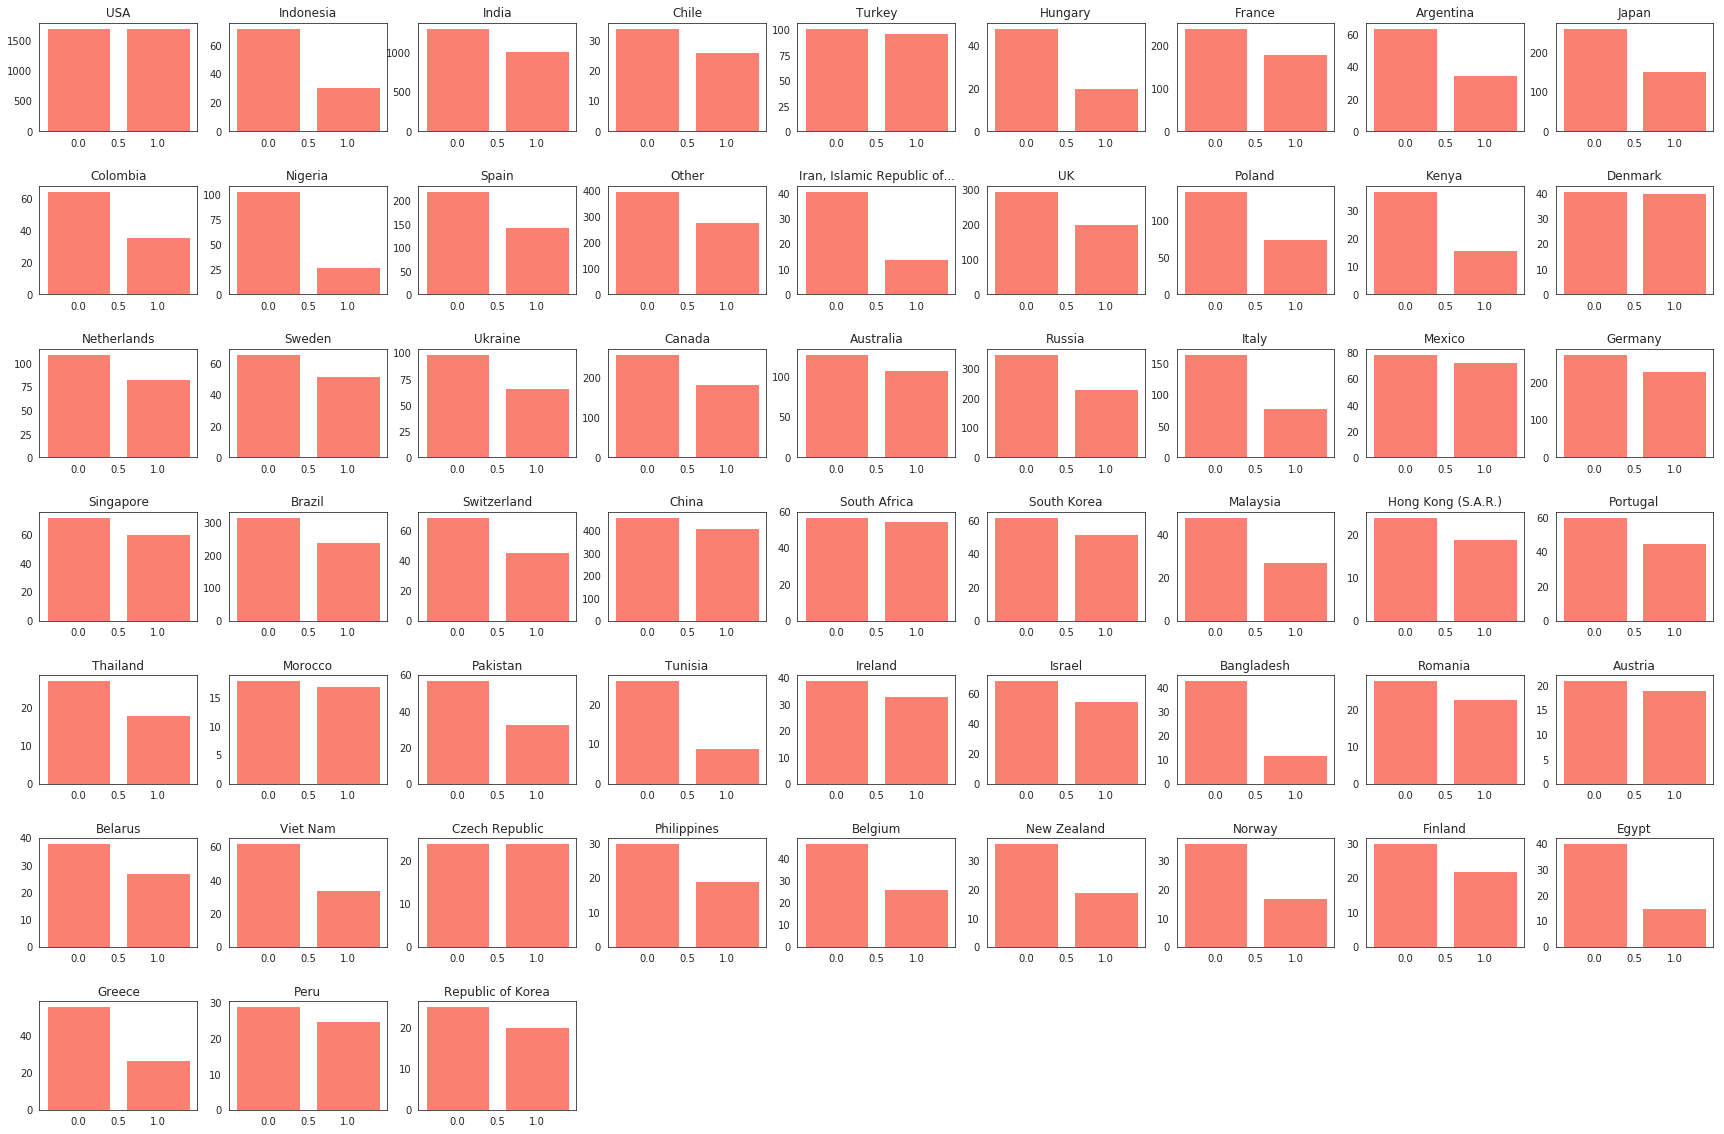

In [85]:
sns.set_style("white")
plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace=0.5)
k = 1
for country in Counter(New_data["Country"]).keys():
    dataX = New_data[New_data['Country'] == country]
    y = np.array(dataX['Salary(USD)'].dropna())
    Y = np.zeros(len(y))
    Y[y > np.median(y)] = 1
    plt.subplot(7,9,k)
    plt.bar(Counter(Y).keys(),Counter(Y).values(),color="salmon")
    if country == 'United Kingdom of Great Britain and Northern Ireland':
        plt.title('UK')
    elif country == "United States of America":
        plt.title("USA")
    else:
        plt.title(country)
    k += 1
plt.show()

In [107]:
nuevo=New_data
nuevo=nuevo[nuevo.Education != "I prefer not to answer"]
nuevo=nuevo[nuevo.Education != 'No formal education past high school']
y=np.zeros(len(New_data))
for j in sorted(Counter(nuevo.Education.dropna()).keys()):
    if j=="Bachelor’s degree":
        y[New_data["Education"]==j]=2
    if j=="Master’s degree":
        y[New_data["Education"]==j]=4
    if j=="Professional degree":
        y[New_data["Education"]==j]=3
    if j=="Doctoral degree":
        y[New_data["Education"]==j]=5
    if j=="Some college/university study without earning a bachelor’s degree":
        y[New_data["Education"]==j]=1
New_data["New_Education"]=y

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [108]:
y=np.ones(len(New_data))
y[New_data.Gender=="Female"]=0
New_data["New_Gender"]=y

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


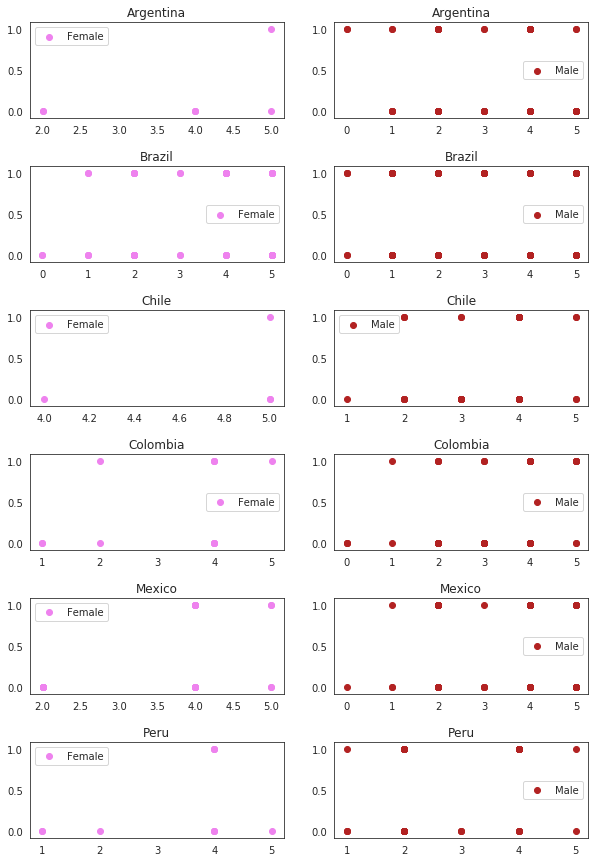

In [180]:
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=0.5)
k=1
for latcountry in Lat_american:
    plt.subplot(6,2,k)
    Patos=New_data[["Country","New_Education","Gender","New_Gender","New_Experience","New_Age","Salary(USD)"]].dropna()
    Patos=Patos[Patos["Country"]==latcountry]
    Patos=Patos[Patos["Gender"]=="Female"]
    y = Patos['Salary(USD)']
    Y = np.zeros(len(y))
    Y[y > np.median(y)] = 1
    plt.scatter(Patos.New_Education,Y,color="violet",label="Female")
    plt.title(latcountry)
    plt.legend() 
    k+=1
    plt.subplot(6,2,k)
    Patos=New_data[["Country","New_Education","Gender","New_Gender","New_Experience","New_Age","Salary(USD)"]].dropna()
    Patos=Patos[Patos["Country"]==latcountry]
    Patos=Patos[Patos["Gender"]=="Male"]
    y = Patos['Salary(USD)']
    Y = np.zeros(len(y))
    Y[y > np.median(y)] = 1
    plt.scatter(Patos.New_Education,Y,color="firebrick",label="Male")
    plt.title(latcountry)
    plt.legend() 
    k+=1
plt.show()

In [36]:
dataX = New_data[New_data['Country'] == 'India']
X = np.array(dataX[['Gender', 'New_Age', 'Education','New_Experience']].dropna())
y = np.array(dataX['Salary(USD)'].dropna())
aa = y > np.median(y)
Y = np.int_(np.zeros(len(y)))
Y[aa] = 1

array([['Male', 23.0, 'Master’s degree', 0.5],
       ['Male', 19.5, 'Master’s degree', 0.5],
       ['Male', 32.0, 'Bachelor’s degree', 2.5],
       ...,
       ['Male', 27.0, 'Bachelor’s degree', 3.5],
       ['Male', 32.0, 'Master’s degree', 7.5],
       ['Female', 23.0, 'Master’s degree', 22.5]], dtype=object)